### Stim Logical vs. Physical Error Rate

Here we plot the logical X error rate, against the physical error rate on data qubits.

In [11]:
import stim
import numpy as np
import matplotlib.pyplot as plt

In [12]:
d = 5
code_distances = [3, 5, 7, 9] #, 11, 13]
batch_size = 500_000
p_phys = np.logspace(-4, -2, num=200)
results_unrotated = {}
results_rotated = {}

In [13]:
for d in code_distances:
    results = []
    for p in p_phys:
        # load circuit with respective X error rate
        circuit = stim.Circuit.generated(
            "surface_code:unrotated_memory_x",
            rounds=d,
            distance=d,
            after_clifford_depolarization=p,
            after_reset_flip_probability=p,
            before_measure_flip_probability=p,
            before_round_data_depolarization=p,
            )

        # This is for sampling from detectors (which introduces temporal dependencies)
        detector_sampler = circuit.compile_detector_sampler()
        shots = detector_sampler.sample(batch_size, append_observables=True)

        # logical observable along boundary
        actual_observable_parts = shots[:, circuit.num_detectors :]
        fraction_observable = np.sum(actual_observable_parts)/batch_size
        results.append(fraction_observable)
    results_unrotated[d] = np.array(results)
    
for d in code_distances:
    results = []
    for p in p_phys:
        # load circuit with respective X error rate
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_x",
            rounds=d,
            distance=d,
            after_clifford_depolarization=p,
            after_reset_flip_probability=p,
            before_measure_flip_probability=p,
            before_round_data_depolarization=p,)

        # This is for sampling from detectors (which introduces temporal dependencies)
        detector_sampler = circuit.compile_detector_sampler()
        shots = detector_sampler.sample(batch_size, append_observables=True)

        # logical observable along boundary
        actual_observable_parts = shots[:, circuit.num_detectors :]
        fraction_observable = np.sum(actual_observable_parts)/batch_size
        results.append(fraction_observable)
    results_rotated[d] = np.array(results)

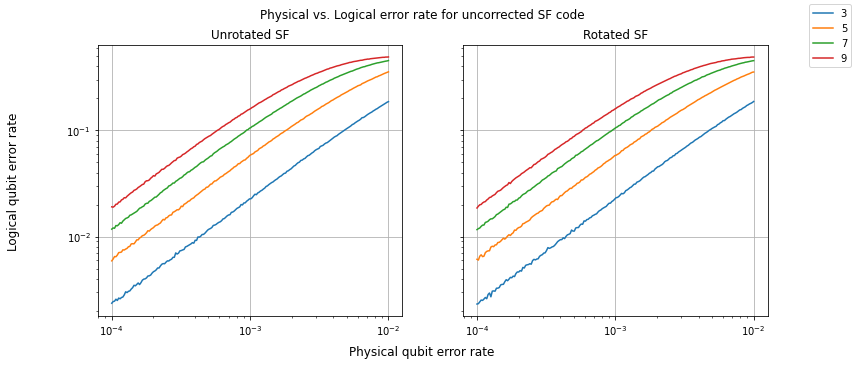

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,5))
fig.suptitle('Physical vs. Logical error rate for uncorrected SF code')

for key in results_unrotated:
    ax1.plot(p_phys, results_unrotated[key], label=key)
ax1.set_title("Unrotated SF")
ax1.grid()
    
for key in results_rotated:
    ax2.plot(p_phys, results_rotated[key])
ax2.grid()
ax2.set_title("Rotated SF")

# plt.ylim(1e-3, 0.6)
plt.xscale('log')
plt.yscale('log')
fig.supxlabel('Physical qubit error rate')
fig.supylabel("Logical qubit error rate")
fig.legend()
fig.savefig("notebook_img/phys_log.png",dpi=199)

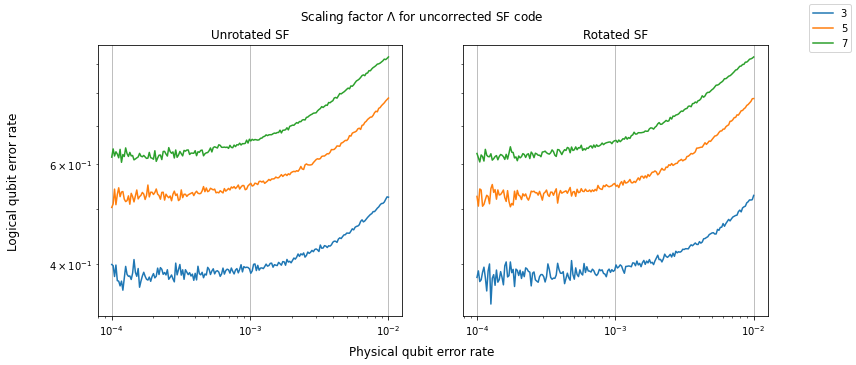

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,5))
fig.suptitle('Scaling factor $\Lambda$ for uncorrected SF code')

for key in results_unrotated:
    if key == code_distances[-1]: continue
    ax1.plot(p_phys, results_unrotated[key]/results_unrotated[key+2], label=key)
ax1.set_title("Unrotated SF")
ax1.grid()
    
for key in results_rotated:
    if key == code_distances[-1]: continue
    ax2.plot(p_phys, results_rotated[key]/results_rotated[key+2])
ax2.grid()
ax2.set_title("Rotated SF")

plt.xscale('log')
plt.yscale('log')
fig.supxlabel('Physical qubit error rate')
fig.supylabel("Logical qubit error rate")
fig.legend()
fig.savefig("notebook_img/scaling.png",dpi=199)

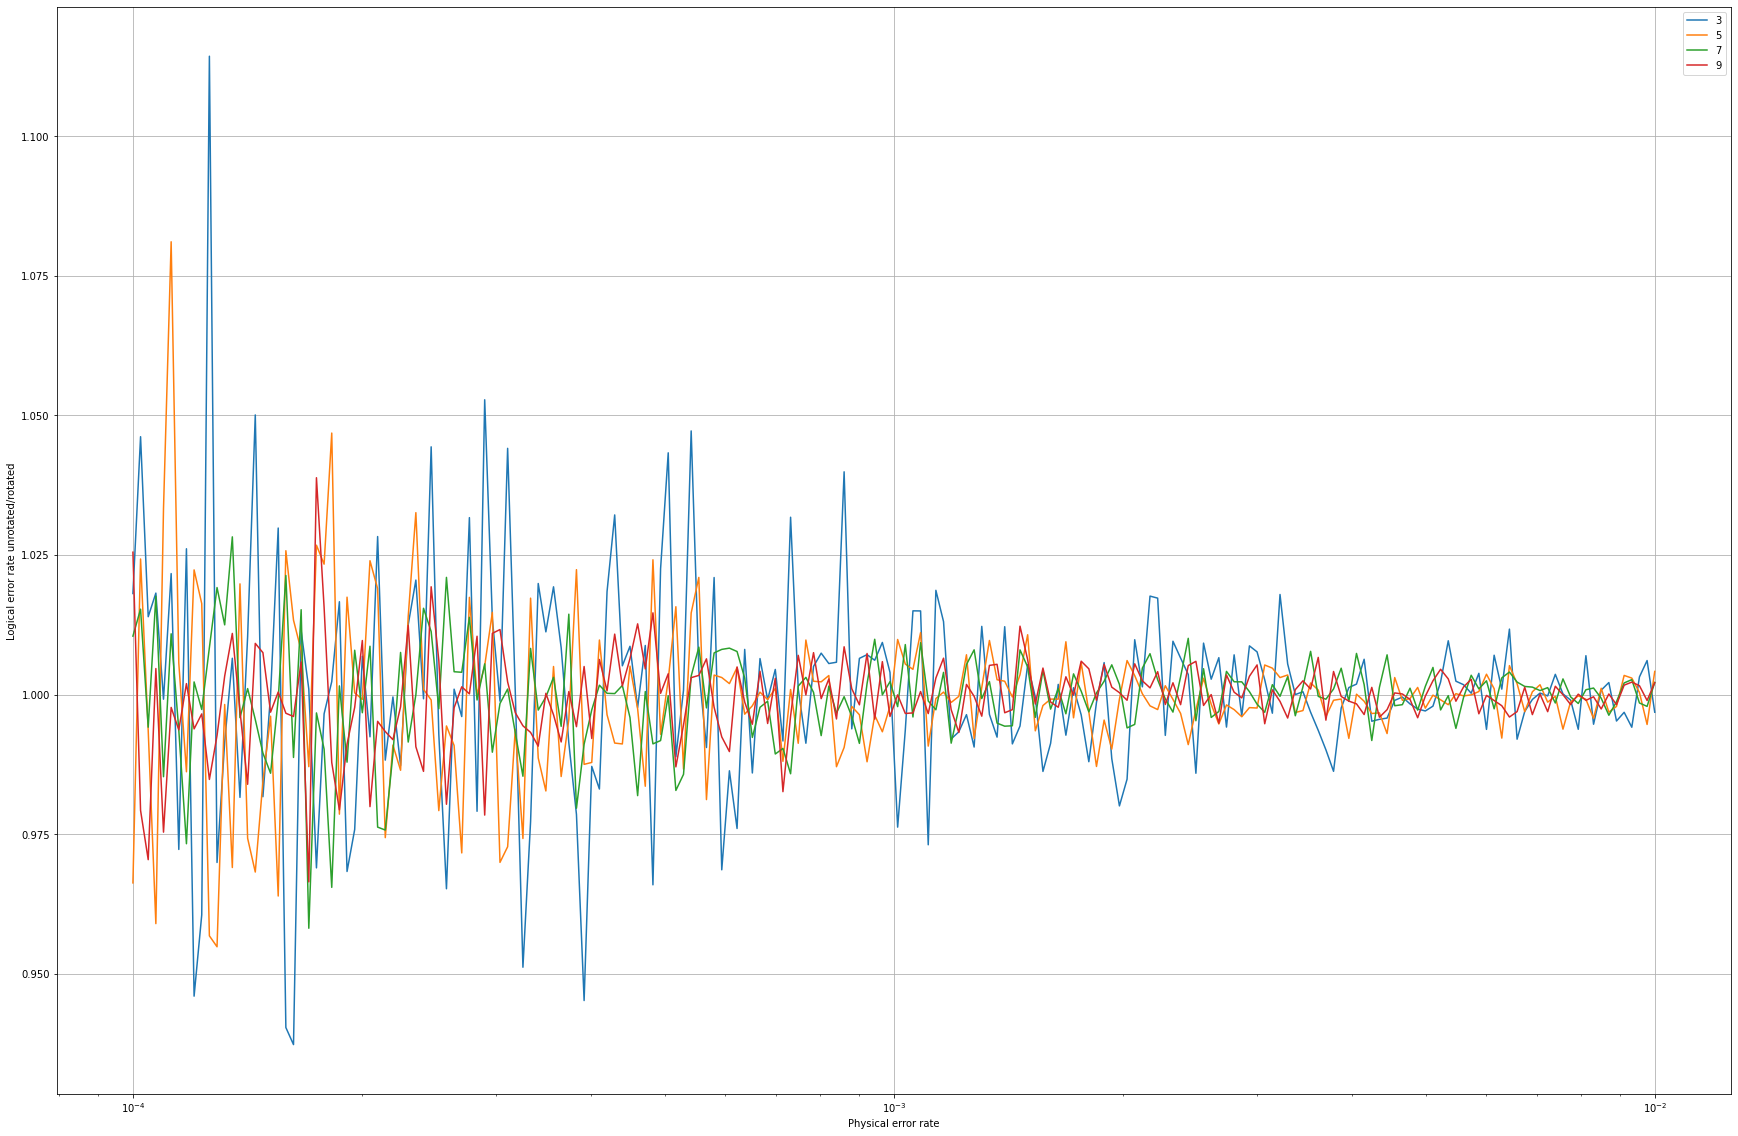

In [16]:
for key in results_unrotated:
    plt.plot(p_phys, results_unrotated[key]/results_rotated[key], label=key)

plt.grid()

plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Physical error rate')
plt.ylabel("Logical error rate unrotated/rotated")
plt.legend()
plt.rcParams["figure.figsize"] = (30,20)
plt.show()